In [1]:
import numpy as np
import pandas as pd
# Setting random seed to get reproducible runs
RSEED = 100

# Importing dataset and processing it

In [2]:
df = pd.read_csv("../data_clean/cancer_industry.csv")

In [5]:
df.head()

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,8.749380e-08,0.0,0.004263,0.000000,5.005340e-10,1.617190e-05,0.000365,0.026608,0.869459,0.180875
1,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,1.687070e-04,0.0,0.084219,1558.288943,6.755460e-06,2.148530e-08,1050.804066,8.594629,42.953215,26.761900
4,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [6]:
df.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'county', 'name', 'industry_code',
       'industry_detail', 'relevant_naics', 'payann', 'total_compensation',
       'added_value ($)', 'local_tranformation_ind', 'estab', 'emp', 'ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR'],
      dtype='object')

In [7]:
df.shape

(7030318, 46)

## Only keeping the values that we are interested in

### Keeping general statistics for all types of cancer

In [8]:
dataset = df[df['cancer'] == 1].copy()
dataset.shape

(305666, 46)

### Keeping the columns that we are interested in

In [9]:
# for now we drop the 'fips' column because we supose that the effect of having an idustry present in a certain
# area will be the same in any location
dataset.drop(['locale', 'fips','areatype', 'cancer', 'stateFIPS', 'state',
              'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
              'incidence rate_lower_95_confidence','incidence rate_upper_95_confidence',
              'industry_detail', 'relevant_naics','county', 'name', 'local_tranformation_ind'], axis=1, inplace=True)

In [10]:
dataset.tail()

,industry_code,payann,total_compensation,added_value ($),estab,emp,ACID,ENRG,ETOX,EUTR,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
7029059,812200,0.000,30961,46819,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7029060,812300,0.000,7516,11735,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7029061,813100,0.177,15995,34235,8,15,0.000001,0.0,0.000001,1.472570e-07,...,2.589830e-11,0.0,0.001015,0.0,0.0,0.0,0.0,0.000049,0.108083,0.000396
7029062,813a00,0.000,12255,21646,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7029063,813b00,0.000,22449,29800,2,0,0.000000,0.0,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


# Now we want to predict the 24 environemental factors from varialbles such as fips, pay_ann, total_compensation, added_value, #estab, #emp

## First we have to create one-hot vectors for idustry_codes and fips values

In [11]:
#initializing 1-hot vectors to 0
for ind_code in dataset["industry_code"].unique():
    dataset[ind_code] = 0
    dataset[ind_code] = dataset[ind_code].astype(np.uint8)

In [12]:
dataset.tail()

,industry_code,payann,total_compensation,added_value ($),estab,emp,ACID,ENRG,ETOX,EUTR,...,322291,311230,332913,334300,335221,325413,333991,311221,335110,335224
7029059,812200,0.000,30961,46819,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
7029060,812300,0.000,7516,11735,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
7029061,813100,0.177,15995,34235,8,15,0.000001,0.0,0.000001,1.472570e-07,...,0,0,0,0,0,0,0,0,0,0
7029062,813a00,0.000,12255,21646,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
7029063,813b00,0.000,22449,29800,2,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def set_one_hot(row):
    row[row['industry_code']] = 1
    return row

In [14]:
dataset = dataset.apply(set_one_hot, axis=1)

In [15]:
len(dataset['industry_code'].unique())

335

In [16]:
dataset.tail()

,industry_code,payann,total_compensation,added_value ($),estab,emp,ACID,ENRG,ETOX,EUTR,...,322291,311230,332913,334300,335221,325413,333991,311221,335110,335224
7029059,812200,0.000,30961,46819,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
7029060,812300,0.000,7516,11735,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
7029061,813100,0.177,15995,34235,8,15,0.000001,0.0,0.000001,1.472570e-07,...,0,0,0,0,0,0,0,0,0,0
7029062,813a00,0.000,12255,21646,1,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
7029063,813b00,0.000,22449,29800,2,0,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#print(list(dataset.columns))

## Partitionning our dataset into train and test sets

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x1 = pd.concat([dataset.loc[:, 'payann':'emp'], dataset.loc[:, '113000':]], axis=1)
y = dataset.loc[:, 'ACID':'WATR']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (213966, 340)
XTest (91700, 340)


## Random Forest Regression

### Train on scaled data

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
regressor_scaled = RandomForestRegressor(n_estimators = 100,
                                  random_state = RSEED)

# Fit on training data
regressor_scaled.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [20]:
from sklearn import metrics
train_rf_predictions = regressor_scaled.predict(X_train)
rf_predictions = regressor_scaled.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('r2_score Train:',r2_train)
print()

print('r2_score Test:', r2_test)

r2_score Train: 0.9455415820656535

r2_score Test: 0.5979759771706092


Text(0, 0.5, 'Feature')

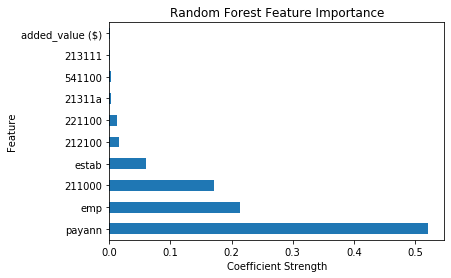

In [21]:
ind = np.argsort(regressor_scaled.feature_importances_)[::-1]
imp = regressor_scaled.feature_importances_[ind][:10]
cols =x1.columns[ind][:10]
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

## Hypertunning on scaled data

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64,80,100]}
rf = RandomForestRegressor(random_state = RSEED)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the buil

/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the buil

In [ ]:
print(clf.best_params_)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, scaler.transform(x1), y, cv=5, scoring='r2')

In [21]:
n_nodes = []
max_depths = []

for ind_tree in regressor.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 83380
Average maximum depth 88
